# Number of Health-Promoting Resources and Life Expectancy at Birth in Each Community of Chicago
### *Capstone Project for IBM Data Science Professional Certificate on Coursera*

## Table of contents
1. [Introduction/Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis and Results](#analysis)
5. [Discussions](#discussion)
6. [Conclusion](#conclusion)
7. [References](#references)

## 1. Introduction/Business Problem <a name="introduction"></a>

In a recent study by NYU School of Medicine, Chicago was found to have the broadest gap in life expectancy at birth across neighborhoods among 500 largest cities in the US (NYU Langone News, 2019). There is a 30-year gap in life expectancy between residents living in Streeterville and people living in Englewood, neighborhoods that are only 9 miles apart (Schencker, 2019). There are many possible factors that could contribute to this disparity in life expectancy including differences in education, race/ethnicity, income, and access to health promoting resources (Hunt, Tran, & Whitman, 2015; Singh et al., 2017). These are some of the social determinants of health, which are “conditions in which people are born, grow, live, work, and age”; these are affected by social structures in turn (Marmot et al., 2012).

Among the social determinants, disparities in race/ethnicity appears to have a substantial effect on the gap in life expectancy (Hunt et al., 2015). This, in turn, may be caused by residential segregation (Williams & Jackson, 2005). Chicago, along with other cities with a wide gap in life expectancy, is highly segregated in terms of race and ethnicity (NYU Langone News, 2019). Even after adjusting for socioeconomic status, segregation due to race/ethnicity can have a profound effect on health through differential exposure to physical environment of neighborhoods, poverty, and economic and educational opportunities (White & Borrell, 2011; Williams & Jackson, 2005). Access to health-promoting resources of neighborhoods, including sports facilities, outdoor places, healthcare, and healthy food has been found to be very important for health, with segregation and disparate allocation of resources limiting access to those health-promoting resources and having a negative effect on health (Billaudeau et al., 2011; Coen & Ross, 2006; Inagami, Cohen, Finch, & Asch, 2006; Kawakami, Winkleby, Skog, Szulkin, & Sundquist, 2011).

In this study, to explore this disparity between neighborhoods further, I used the Foursquare API to search for health-promoting venues in each community and clustered the communities using k-means clustering based on the frequency of each category of those venues. Those clusters were compared in terms of life expectancy. The clusters were also mapped on a choropleth map of Chicago communities so that government officials and any stakeholders in the healthcare business of Chicago can identify the areas of need and allocate their resources accordingly.


## 2. Data <a name="data"></a>

Life expectancy at birth data for each community of Chicago for year 2016 (2017 also exists, but the most recent global data was from 2016) was taken from the Chicago Health Atlas (City Tech Collaborative & Chicago Department of Public Health, n.d.). This dataset was produced using death certificate files provided by the Illinois Department of Public Health (IDPH) with life expectancy calculated using the Chiang methodology. This data was used to compare life expectancy at birth among communities and produce a choropleth map visualizing the disparities. The life expectancy data of various countries including the US for year 2016 was retrieved from WHO Global Health Observatory data repository (WHO, 2018).

The geojson file of Chicago communities used to indicate community boundaries on the maps was taken from the Chicago Data Portal (City of Chicago, 2018). Health resources for each community was searched using the Foursquare API based on the latitude and longitude of each community gathered utilizing the geopy python package (Nominatim and GeoNames) and Google. The list of resources was retrieved on 8/14/19 around 8:00 AM. This data was used to compare the health-resources of each community and cluster them. Foursquare venue categories were taken from the comprehensive list of categories on Foursquare’s official website and manually grouped into 4 different types representing access to sports facilities, access to outdoor places, access to healthcare, and access to healthy food.

## 3. Methodology <a name="methodology"></a>

#### 3.1 Data cleaning and exploratory analysis
Data was retrieved from the Chicago Health Atlas and cleaned so that the dataset would only have the 2016 data of life expectancy at birth for each community. Using box plot, bar chart, and descriptive statistics tables, the disparity in life expectancy was explored, and life expectancies were compared with those of other nations. The data of life expectancy in 2016 from other countries was cleaned, and all the data points were plotted along with the lowest and the highest life expectancies from Chicago communities data to illustrate their positions compared to the rest of the world.

#### 3.2 Foursquare API and retrieval of health-promoting venues within each community
In order to look at the disparities in health-promoting resources, Foursquare API was used to retrieve venues of certain categories within a set radius around each community's GPS coordinates. I manually went through each category on the Categories page of Foursquare website (https://developer.foursquare.com/docs/resources/categories), assigning relevant categories to the following groups: 1) Access to sports facilities, 2) Access to outdoor places, 3) Access to healthcare, 4) Access to healthy food. For access to sports facilities, all the subcategories under Athletics & Sports category, such as gym/fitness centers, baseball fields, tennis courts, and other similar categories, was used. For access to outdoor places, a selection of categories including park, playground, and bike trail were used. Access to healthcare includes all the subcategories under the Medical Center category except veterinarians. For access to healthy food, categories such as farmers market, grocery store, and organic grocery were selected. When using major categories, all the subcategories were retrieved using Foursquare API since just using the major category would results in number of all the venues from that category being limited by the API's limit for each request.

GPS coordinates of each community were retrieved using the geopy package with Nominatim geocoder. GeoNames was used to fix South Deering, Lincoln Park, Albany Park, Lincoln Square, Logan Square. Coordinates of Jefferson Park, Dunning, North Center, Humboldt Park, and Washington Heights communities were fixed manually using coordinates Google provided for each community. The reason for some coordinates being out of place seems to be because there are community names that are the same as neighborhood names and/or names of other landmarks. Venues within 1250 meters of the GPS coordinates of each community that belong to each of the four groups were searched using Foursquare API. Number of venues belonging to each group was visualized using tables. 

#### 3.3 Number of health-promoting resources and life expectancy
Regression plot was used to visualize the relationship between the number of health-promoting resources and life expectancy. The number of resources in each category was also used to draw scatter plots to illustrate the relationship between each category of resources and life expectancy. Correlation between number of health-promoting resources and life expectancy was explored using Pearson's correlation coefficient and testing its significance.

#### 3.4 Clustering and comparison of clusters
The number of venues (health-promoting resources) were normalized using StandardScaler. The elbow method with the sum of squared distances was used to find the optimal number of clusters. Using the normalized number of resources in each category and the number of clusters, the communities were clustered into different groups using *k*-means clustering. Different clusters were characterized according to the distribution of health-promoting resources. One-way ANOVA was used to see if there is indeed differences in life expectancies of different clusters.

#### 3.5 Map visualization
Folium library was used to create choropleth map of life expectancies. A geojson layer of community boundaries was used to indicate community areas. With O'Hare and Lakeview communities, the names were changed to OHARE and LAKE VIEW to reflect the community names in the geojson file. Clustering of communities was visualized by using different colored markers to mark communities belonging to different clusters.

## 4. Analysis and Results <a name="analysis"></a>

In [2]:
# Install and import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!pip install xlrd
import xlrd # library to read excel files

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.geocoders import GeoNames

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans # for clustering using kmeans
from sklearn.preprocessing import StandardScaler # for normalization of data for kmeans clustering

from scipy import stats

!pip install 'folium>=0.10.0'
import folium # map rendering library

from IPython.display import IFrame # to display html map

import warnings
warnings.filterwarnings('ignore')

#### 4.1 Exploratory analysis of life expectancy

Before basic exploratory analysis is performed on the dataset, a dataframe was constructed from the data. A dataframe of communities and their life expectancies was constructed by reading the xlsx file from Chicago Health Atlas. The dataframe was cleaned to only include the data for 2016. The cleaned dataframe is presented below to show the life expectancy for all the communities.

In [4]:
# Read the excel file of Chciago's life expectancy at birth
url = "https://citytech-health-atlas-data-prod.s3.amazonaws.com/uploads/uploader/path/601/Life_Expectancy.xlsx"
chicago_le_raw = pd.read_excel(url)
chicago_le_raw.head()

,Category,SubCategory,Indicator,Year,Geography,Geo_Group,Geo_ID,Demography,Demo_Group,Number,Cum_Number,Ave_Annual_Number,Crude_Rate,Lower_95CI_Crude_Rate,Upper_95CI_Crude_Rate,Age_Adj_Rate,Lower_95CI_Age_Adj_Rate,Upper_95CI_Age_Adj_Rate,Percent,Lower_95CI_Percent,Upper_95CI_Percent,Weight_Number,Weight_Percent,Lower_95CI_Weight_Percent,Upper_95CI_Weight_Percent,Map_Key,Flag
0,Mortality,Quality of Life,Life expectancy,2010,City,Chicago,606,Race-ethnicity,All race-ethnicities,77.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G
1,Mortality,Quality of Life,Life expectancy,2010,City,Chicago,606,Race-ethnicity,Hispanic or Latino,84.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G
2,Mortality,Quality of Life,Life expectancy,2010,City,Chicago,606,Race-ethnicity,Non-Hispanic Asian or Pacific Islander,86.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G
3,Mortality,Quality of Life,Life expectancy,2010,City,Chicago,606,Race-ethnicity,Non-Hispanic African American or Black,72.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G
4,Mortality,Quality of Life,Life expectancy,2010,City,Chicago,606,Race-ethnicity,Non-Hispanic White,79.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G


In [5]:
# Only keep 2016 data and only keep relevant columns
chicago_le_comm = chicago_le_raw[chicago_le_raw['Year']==2016]
chicago_le_comm = chicago_le_comm[['Geo_Group', 'Geo_ID', 'Number']]

# Store Chicago city life expectancy in a separate variable and drop the city rows
chicago_le = round(chicago_le_comm.iloc[0, 2], 1)
chicago_le_comm.drop(chicago_le_comm[chicago_le_comm['Geo_ID']==606].index, axis=0, inplace=True)

# Further clean the data
chicago_le_comm.set_index('Geo_ID', inplace=True) # set the index to community number
for i in chicago_le_comm['Geo_Group'].index:      # remove community number from names of communities
    chicago_le_comm['Geo_Group'][i] = chicago_le_comm['Geo_Group'][i].split('-')[1]
chicago_le_comm.rename(columns={'Geo_Group': 'Community',
                                'Number': 'Life Expectancy'}, inplace=True)
chicago_le_comm['Life Expectancy'] = round(chicago_le_comm['Life Expectancy'], 1)

print("The life expectancy at birth in 2016 for Chicago is", chicago_le)
chicago_le_comm

The life expectancy at birth in 2016 for Chicago is 77.4


,Community,Life Expectancy
Geo_ID,,
1,Rogers Park,75.3
2,West Ridge,79.2
3,Uptown,76.1
4,Lincoln Square,81.7
5,North Center,82.1
6,Lakeview,81.7
7,Lincoln Park,81.3
8,Near North Side,83.3
9,Edison Park,83.4


To explore the characteristics of the data, a box plot and a simple descriptive statistics table were used. The box plot shows the disparities in life expectancy at birth across all the communities in Chicago. The red line represents the life expectancy for the whole city, which is 77.4. As shown in the box plot, there is a huge gap between the community with the highest life expectancy, Edison Park with 83.4, and the community with the lowest life expectancy, Fuller Park with 66.9.

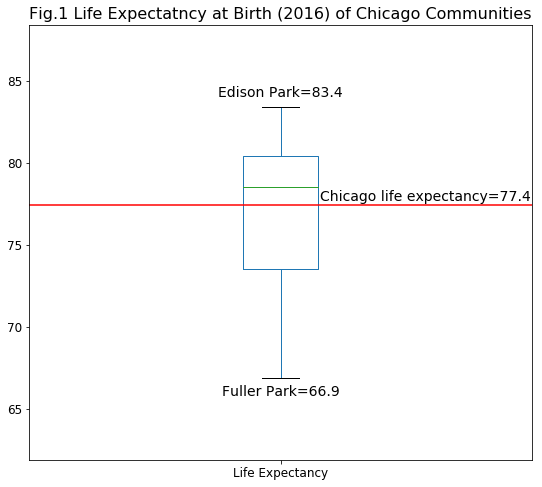

In [6]:
# Box plot of life expectancy of communitities
chicago_le_comm.plot(kind='box', figsize=(9, 8), fontsize=12)

# Add a line representing life expectancy for the whole city
plt.axhline(chicago_le, color='r')
text = "Chicago life expectancy=" + str(chicago_le)
plt.annotate(text, xy=(1.078, chicago_le + 0.3), fontsize=14)

# Get the higest and lowest life expectancies and the difference
max_le = max(chicago_le_comm['Life Expectancy'])
min_le = min(chicago_le_comm['Life Expectancy'])
diff_le = max_le - min_le

# Get the communities with the highest and lowest life expectancies
max_comm = chicago_le_comm['Community'][chicago_le_comm['Life Expectancy']==max_le].reset_index(drop=True)
min_comm = chicago_le_comm['Community'][chicago_le_comm['Life Expectancy']==min_le].reset_index(drop=True)

# Set title and y limit
plt.title("Fig.1 Life Expectatncy at Birth (2016) of Chicago Communities", fontsize=16)
plt.ylim(min_le - 5, max_le + 5)

# Annotate the box plot with communities with the highest and lowest life expectancies
max_text = max_comm[0] + "=" + str(max_le)
min_text = min_comm[0] + "=" + str(min_le)

plt.annotate(max_text, xy=(1, max_le + 0.6), ha='center', fontsize=14)
plt.annotate(min_text, xy=(1, min_le - 1.1), ha='center', fontsize=14)

plt.show()

In [6]:
print("The difference between the highest life expectancy and the lowest life expectancy is ", round(diff_le, 1))

The difference between the highest life expectancy and the lowest life expectancy is  16.5


The table shows that the bottom 25% of the communities have life expectancies of below 73.5, which is much lower than Chicago average of 77.4. The top 25% of the communities have life expectancies of above 80.4, which is much higher than Chicago average of 77.4. The difference in life expectancy between Edison Park and Fuller Park was 16.5, which is not as dramatic as the 30 year gap but is still substantial. The median life expectancy is 78.5, which is higher than the life expectancy for the whole city. A little more than half of the communities have life expectancies of more than the city life expectancy. The data looks to be negatively skewed, so the communities in the lower half have life expectancies that are spread farther apart.

In [7]:
# Simple descriptive statistics table
chicago_le_comm.describe()

,Life Expectancy
count,77.000000
mean,76.922078
std,4.336492
min,66.900000
25%,73.500000
50%,78.500000
75%,80.400000
max,83.400000


To illustrate how the communities of Chicago compare with other countries in the world in terms of life expectancy at birth, country life expectancy data from WHO Global Health Observatory data repository was used. After cleaning the dataset, 

In [8]:
# Retrieve world life expectancy by country data
url2 = 'https://apps.who.int/gho/athena/data/GHO/WHOSIS_000001,WHOSIS_000015,WHOSIS_000002,WHOSIS_000007?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=crosstable&format=csv'
world_le_raw = pd.read_csv(url2)

In [9]:
# Clean the dataset
world_le = world_le_raw.rename(columns={'Unnamed: 0': 'Country', 'Unnamed: 1': 'Year'}) # rename columns
world_le.drop([0], axis=0, inplace=True) # drop the first row of extra headers

world_le['Year'] = world_le['Year'].astype('int')
world_le = world_le[world_le['Year']==2016] # only keep year 2016
world_le.drop(world_le[world_le['Country']=='Rwanda'].index, axis=0, inplace=True) # dropped because of different format

world_le = world_le.iloc[:, 0:3] # only keep the life expectancy at birth column
world_le['Life expectancy at birth (years)'] = world_le['Life expectancy at birth (years)'].astype('float')
world_le.drop('Year', axis=1, inplace=True) # drop year column
world_le.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)
world_le.reset_index(drop=True, inplace=True)

world_le.head()

,Country,Life Expectancy
0,Afghanistan,62.7
1,Albania,76.4
2,Algeria,76.4
3,Angola,62.6
4,Antigua and Barbuda,75.0


The lowest and the highest life expectancies and the average life expectancy from Chicago dataset were combined with the world dataset. The combined dataset was then sorted and visualize using a bar chart. Fig.2 shows that while the life expectancy of Edison Park is higher than that of all the other countries in the world except for Japan, and the average life expectancy of Chicago is higher than most countries, the life expectancy of Fuller Park belongs in the bottom half. This chart better illustrates how much difference there between communities of the same city in terms of life expectancy at birth. There are clearly differences in these communities that are affecting life expectancy.

In [10]:
le_all = world_le

# Extract values from Chicago dataset.
chicago_ext = pd.concat([chicago_le_comm[chicago_le_comm['Life Expectancy']==max_le], # highest life expectancy
                         chicago_le_comm[chicago_le_comm['Life Expectancy']==min_le], # lowest life expectancy
                         pd.DataFrame({'Community': 'CHICAGO',                        # Chicago average
                                       'Life Expectancy': chicago_le}, index=[0])])
chicago_ext.reset_index(drop=True, inplace=True)

# Chcange column names
chicago_ext.rename(columns={'Community': 'Location'}, inplace=True)
le_all.rename(columns={'Country': 'Location'}, inplace=True)
le_all = pd.concat([chicago_ext, le_all])

# Sort values and reset index
le_all.sort_values(by='Life Expectancy', inplace=True)
le_all.reset_index(drop=True, inplace=True)

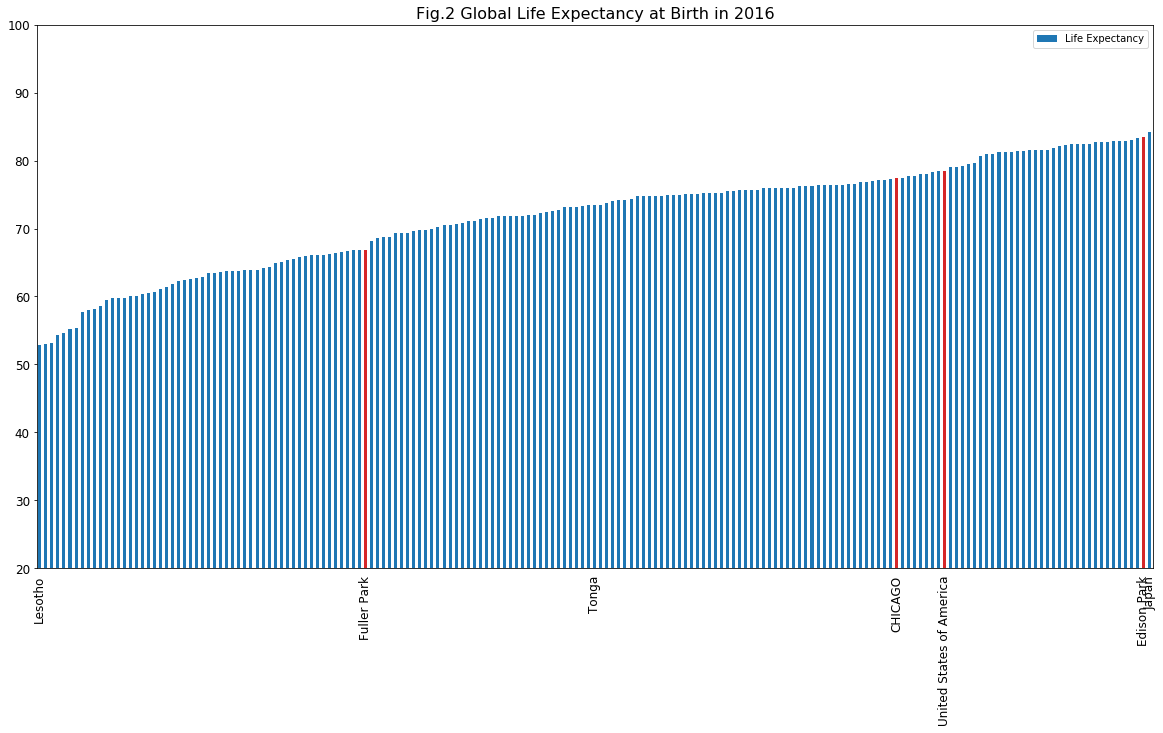

In [11]:
# Set the color of the 4 bars representing data from Chicago and the US as red
color = np.array(['#1f77b4'] * le_all.shape[0])
for i in chicago_ext.index:
    color[le_all[le_all['Location']==chicago_ext.iloc[i, 0]].index] = '#d62728'
color[le_all[le_all['Location']=='United States of America'].index] = '#d62728'
    
# Set tick labels for those bars and countries with min, max, and median life expectancy
tick_labs = np.empty(le_all.shape[0], dtype=object)
for i in chicago_ext.index:
    tick_labs[le_all[le_all['Location']==chicago_ext.iloc[i, 0]].index] = chicago_ext.iloc[i, 0]
tick_labs_index = [0,                         # set indexes for min, max, median global life expectancies, and the US
                   int(len(tick_labs) / 2),
                   le_all[le_all['Location']=='United States of America'].index,
                   len(tick_labs) - 1]
for i in tick_labs_index:
    tick_labs[i] = le_all['Location'][i]

# Bar chart of the dataset
ax = le_all.plot(kind='bar',
                 figsize=(20, 10),
                 fontsize=12,
                 color=[color]
                )
ax.set_title('Fig.2 Global Life Expectancy at Birth in 2016', fontsize = 16)
ax.set_ylim([20, 100])
ax.tick_params(bottom=False)
ax.set_xticklabels(tick_labs) # Only show the tick labels of interest

plt.show()

#### 4.2 Distribution of health-promoting resources across communities

To present the possible differences leading to life expectancy, health-promoting resources of each community was gathered. Since each community's GPS coordinates are needed to search for venues in each community, geopy package was used to retrieve the latitude and longitudes of each community. As explained in the Methodology section, Nominatim was the main geocoder while GeoNames and Google were also used to fix community coordinates that were out of place. A geojson file of community boundaries was overlaid to show community areas. The map of Chicago and its communities are shown below.

In [12]:
lat = []
lng = []

# Retrieve the coordinates
for comm in chicago_le_comm['Community']:
    geolocator = Nominatim(user_agent="ch_explorer")
    address = '{}, Chicago, IL'.format(comm)
    location = geolocator.geocode(address)
    lat.append(location.latitude)
    lng.append(location.longitude)

# Create a dataframe of community coordinates
comm_coord = pd.DataFrame({'Community': chicago_le_comm['Community'], 'Latitude': lat, 'Longitude': lng})

In [16]:
# Community coordinates that need to be fixed
fix_coord = ['South Deering',
             'Lincoln Park',
             'Albany Park',
             'Lincoln Square',
             'Logan Square',
             'Greater Grand Crossing',
             'Dunning']

# Fix the coordinates
for comm in fix_coord:
    geolocator = GeoNames(username='frozenkorean')
    address = '{}, Chicago, IL'.format(comm)
    location = geolocator.geocode(query=address)
    lat1 = location.latitude
    lng1 = location.longitude
    comm_coord['Latitude'][comm_coord['Community']==comm] = lat1
    comm_coord['Longitude'][comm_coord['Community']==comm] = lng1
    
# Fix Jefferson Park, Dunning, North Center, Humboldt Park, and Washington Heights
comm_coord['Latitude'][comm_coord['Community']=='Jefferson Park'] = 41.982500
comm_coord['Longitude'][comm_coord['Community']=='Jefferson Park'] = -87.770400

comm_coord['Latitude'][comm_coord['Community']=='Dunning'] = 41.945300
comm_coord['Longitude'][comm_coord['Community']=='Dunning'] = -87.807000

comm_coord['Latitude'][comm_coord['Community']=='North Center'] = 41.946694
comm_coord['Longitude'][comm_coord['Community']=='North Center'] = -87.688306

comm_coord['Latitude'][comm_coord['Community']=='Humboldt Park'] = 41.899100
comm_coord['Longitude'][comm_coord['Community']=='Humboldt Park'] = -87.721300

comm_coord['Latitude'][comm_coord['Community']=='Washington Heights'] = 41.717600
comm_coord['Longitude'][comm_coord['Community']=='Washington Heights'] = -87.643100

In [17]:
# Preview the dataframe of coordinates
comm_coord.head()

,Community,Latitude,Longitude
Geo_ID,,,
1,Rogers Park,42.010531,-87.670748
2,West Ridge,42.003548,-87.696243
3,Uptown,41.966630,-87.655546
4,Lincoln Square,41.975870,-87.689220
5,North Center,41.946694,-87.688306


In [18]:
# Download and store a geojson file of Chicago
!wget --quiet https://raw.githubusercontent.com/frozenkorean/Coursera_Capstone/master/chicago-communities.geojson -O CH.geojson
ch_geo = r'CH.geojson'

In [19]:
# Get GPS coordinates of Chicago
geolocator = Nominatim(user_agent="ch_explorer")
address = 'Chicago, IL'
location = geolocator.geocode(address)
lat_ch = location.latitude
lng_ch = location.longitude

In [26]:
# Create a map of Chicago
map_chicago = folium.Map(location=[lat_ch, lng_ch], zoom_start=11) # create a map centering on Chciago

# Loop through communities and add to incidents feature group
incidents = folium.map.FeatureGroup(name='Community') 

for lat, lng, label in zip(comm_coord.Latitude, comm_coord.Longitude, comm_coord.Community):
    incidents.add_child(
        # create markers on the latitude and longitude of each community
        folium.CircleMarker([lat, lng],
                            radius=5,
                            tooltip=label, # shows names of communities when mouse moves over a marker
                            color='blue',
                            fill=True,
                            fill_color='#3186cc',
                            fill_opacity=0.4))
    
folium.GeoJson(ch_geo, name='Community Boundaries').add_to(map_chicago) # community boundary geojson file added to the map

# Add incidents to map
map_chicago.add_child(incidents)

# Add layer control
folium.LayerControl().add_to(map_chicago)

# Save the map to html since Jupyter notebook has trouble rendering it
map_chicago.save('chicago.html')

In [33]:
# View the html map
IFrame(src='https://github.com/frozenkorean/Coursera_Capstone/blob/master/chicago.htm', width=800, height=800)

Then, relevant categories of Foursquare venues were manually put into different groups as explained in the methodology section.  A table of full list of categories is shown below.

In [21]:
# The code was removed by Watson Studio for sharing.

In [22]:
# Use Foursquare API to retrieve all the categories
url3 = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
                    CLIENT_ID, 
                    CLIENT_SECRET, 
                    VERSION)
results = requests.get(url3).json()['response']['categories']

In [23]:
# Go through the json file of Foursquare categories to retrieve the subcategories of the following 2 categories
cat_sports = []
cat_medical = []

for i in range(len(results)):
    for j in range(len(results[i]['categories'])):
        if results[i]['categories'][j]['id'] == '4f4528bc4b90abdf24c9de85': # 'Athletics & Sports' category
            for h in range(len(results[i]['categories'][j]['categories'])):
                cat_sports.append([('Sports facilities',
                                    results[i]['categories'][j]['categories'][h]['name'],
                                    results[i]['categories'][j]['categories'][h]['id'])])
                
        if results[i]['categories'][j]['id'] == '4bf58dd8d48988d104941735': # 'Medical Centers' category
            for h in range(len(results[i]['categories'][j]['categories'])):
                cat_medical.append([('Healthcare',
                                     results[i]['categories'][j]['categories'][h]['name'],
                                     results[i]['categories'][j]['categories'][h]['id'])])

# Access to sports facilities and access to healthcare
cat_sports = pd.DataFrame([cat for cat_list in cat_sports for cat in cat_list])
cat_sports.columns = ['Access Category',
                      'Category Names',
                      'ID']
cat_medical = pd.DataFrame([cat for cat_list in cat_medical for cat in cat_list])
cat_medical.columns = ['Access Category',
                      'Category Names',
                      'ID']

# Drop veterinarian from healthcare facilities
cat_medical.drop(cat_medical[cat_medical.ID=='4d954af4a243a5684765b473'].index, axis=0, inplace=True)

# Access to outdoor places
cat_outdoor = pd.DataFrame({'Access Category': ['Outdoor places',
                                                'Outdoor places',
                                                'Outdoor places',
                                                'Outdoor places',
                                                'Outdoor places',
                                                'Outdoor places',
                                                'Outdoor places',
                                                'Outdoor places',
                                                'Outdoor places'],
                           'Category Names': ['Beach',
                                              'Bike Trail',
                                              'Park',
                                              'Playground',
                                              'Pool',
                                              'Rock Climbing Spot',
                                              'Ski Area',
                                              'State / Provincial Park',
                                              'Trail'],
                           'ID': ['4bf58dd8d48988d1e2941735',
                                           '56aa371be4b08b9a8d57355e',
                                           '4bf58dd8d48988d163941735',
                                           '4bf58dd8d48988d1e7941735',
                                           '4bf58dd8d48988d15e941735',
                                           '50328a4b91d4c4b30a586d6b',
                                           '4bf58dd8d48988d1e9941735',
                                           '5bae9231bedf3950379f89d0',
                                           '4bf58dd8d48988d159941735']})


# Access to healthy food
cat_food = pd.DataFrame({'Access Category': ['Healthy food',
                                             'Healthy food',
                                             'Healthy food',
                                             'Healthy food',
                                             'Healthy food',
                                             'Healthy food',
                                             'Healthy food'],
                         'Category Names': ['Farmers Market',
                                            'Fish Market',
                                            'Grocery Store',
                                            'Health Food Store',
                                            'Organic Grocery',
                                            'Supermarket',
                                            'Fruit & Vegetable Store'],
                         'ID': ['4bf58dd8d48988d1fa941735',
                                '4bf58dd8d48988d10e951735',
                                '4bf58dd8d48988d118951735',
                                '50aa9e744b90af0d42d5de0e',
                                '52f2ab2ebcbc57f1066b8b45',
                                '52f2ab2ebcbc57f1066b8b46',
                                '52f2ab2ebcbc57f1066b8b1c']})

In [24]:
# Dataframe of categories
categories = pd.concat([cat_sports,
                        cat_outdoor,
                        cat_medical,
                        cat_food],
                        ignore_index=True)
categories

,Access Category,Category Names,ID
0,Sports facilities,Badminton Court,52e81612bcbc57f1066b7a2b
1,Sports facilities,Baseball Field,4bf58dd8d48988d1e8941735
2,Sports facilities,Basketball Court,4bf58dd8d48988d1e1941735
3,Sports facilities,Bowling Green,52e81612bcbc57f1066b7a2f
4,Sports facilities,Curling Ice,56aa371be4b08b9a8d57351a
5,Sports facilities,Golf Course,4bf58dd8d48988d1e6941735
6,Sports facilities,Golf Driving Range,58daa1558bbb0b01f18ec1b0
7,Sports facilities,Gym / Fitness Center,4bf58dd8d48988d175941735
8,Sports facilities,Hockey Field,4f452cd44b9081a197eba860
9,Sports facilities,Hockey Rink,56aa371be4b08b9a8d57352c


Foursquare API and its search function was utilized to gather venues belonging to each of the four categories. Radius was set to 1250 meters to give it an ample room to gather venues from. When the API request involved all the categories for all the communities, the request did not finish even after several hours. So, each access category was run separately.

In [26]:
# Define a function to get nearby venues belonging to the categories.
def searchNearbyVenues(community, categories, cat_IDs, latitudes, longitudes, radius=1250):    
    venues_list=[]
    for comm, lat, lng in zip(community, latitudes, longitudes): # for each community
        for cat, cat_id in zip(categories, cat_IDs):             # go through each category and subcategory on the list
            # create the API request URL
            url4 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                    CLIENT_ID, 
                    CLIENT_SECRET, 
                    VERSION, 
                    lat, 
                    lng, 
                    radius,
                    cat_id) # category ID 
            
            # make the GET request
            results = requests.get(url4).json()["response"]['venues']
        
            # return only relevant information for each nearby venue
            venues_list.append([(comm,
                                 lat,
                                 lng,
                                 cat, # access category
                                 v['name'],
                                 v['location']['lat'],
                                 v['location']['lng'],
                                 v['categories'][0]['name']) for v in results])
    
    # constuct a dataframe of nearby venues in the categories
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 
                             'Latitude',
                             'Longitude',
                             'Access Category',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']
    
    return(nearby_venues)

In [52]:
# Get the venues belonging to sports facilities category
chicago_venues1 = searchNearbyVenues(community=comm_coord['Community'],
                                     categories=cat_sports['Access Category'],
                                     cat_IDs=cat_sports.ID,
                                     latitudes=comm_coord['Latitude'],
                                     longitudes=comm_coord['Longitude'])

In [28]:
# Get the venues belonging to outdoor places category
chicago_venues2 = searchNearbyVenues(community=comm_coord['Community'],
                                     categories=cat_outdoor['Access Category'],
                                     cat_IDs=cat_outdoor.ID,
                                     latitudes=comm_coord['Latitude'],
                                     longitudes=comm_coord['Longitude'])

In [29]:
# Get the venues belonging to healthcare facilities category
chicago_venues3 = searchNearbyVenues(community=comm_coord['Community'],
                                     categories=cat_medical['Access Category'],
                                     cat_IDs=cat_medical.ID,
                                     latitudes=comm_coord['Latitude'],
                                     longitudes=comm_coord['Longitude'])

In [31]:
# Get the venues belonging to healthy food category
chicago_venues4 = searchNearbyVenues(community=comm_coord['Community'],
                                     categories=cat_food['Access Category'],
                                     cat_IDs=cat_food.ID,
                                     latitudes=comm_coord['Latitude'],
                                     longitudes=comm_coord['Longitude'])

In [45]:
# Combine the venues lists and save it as a csv file to retrieve it later without using the Foursquare API again
chicago_venues = pd.concat([chicago_venues1, chicago_venues2, chicago_venues3, chicago_venues4]).reset_index(drop=True)

chicago_venues.to_csv(r'chicago_venues.csv', index=None, header=True)

In [25]:
# Load from the csv file
chicago_venues = pd.read_csv('chicago_venues.csv')

In [26]:
# Preview of the venue list
chicago_venues.head()

,Community,Latitude,Longitude,Access Category,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rogers Park,42.010531,-87.670748,Sports facilities,Loyola Park,42.011390,-87.662364,Park
1,Rogers Park,42.010531,-87.670748,Sports facilities,Pottawattomie Park,42.015112,-87.676928,Park
2,Rogers Park,42.010531,-87.670748,Sports facilities,CMSA Basketball @ Roger C. Sullivan High School,42.002506,-87.668778,Basketball Court
3,Rogers Park,42.010531,-87.670748,Sports facilities,PBA Chicago Winter League,42.009265,-87.663158,Basketball Court
4,Rogers Park,42.010531,-87.670748,Sports facilities,The Better Golf Academy - Illinois,42.005268,-87.680919,Golf Course


In [27]:
# Preview of the venue list
chicago_venues.tail()

,Community,Latitude,Longitude,Access Category,Venue,Venue Latitude,Venue Longitude,Venue Category
7727,Edgewater,41.983369,-87.663952,Healthy food,Thuong Xa My A Supermarket,41.971092,-87.659200,Supermarket
7728,Edgewater,41.983369,-87.663952,Healthy food,Asian Supermarket,41.977397,-87.660143,Supermarket
7729,Edgewater,41.983369,-87.663952,Healthy food,Win Sing Supermarket,41.970316,-87.659206,Supermarket
7730,Edgewater,41.983369,-87.663952,Healthy food,Viet Hoa,41.973223,-87.656826,Grocery Store
7731,Edgewater,41.983369,-87.663952,Healthy food,Broadway Supermarket,41.970974,-87.659403,Supermarket


Total number of health-promoting resources gathered through Foursquare API was 7732. The healthcare category had the most number of venues with 3314, and the healthy food category had the fewest number of venues with 956.

In [28]:
# Group by access category
total_count = chicago_venues.groupby('Access Category').count().Community
total_count = pd.DataFrame(total_count).rename(columns={'Community': 'Number of Venues'})
del total_count.index.name # remove index name

# Transpose and calculate total
total_count = total_count.T
total_count['Total'] = total_count.sum(axis=1)
total_count

,Healthcare,Healthy food,Outdoor places,Sports facilities,Total
Number of Venues,3314,956,2005,1457,7732


Next, the venue list was grouped by community and access category so that the number of resources for each community were divided into the categories that the resources belong to.

In [29]:
# Group the venue list by community and access category.
chicago_venue_grp = chicago_venues.groupby(['Community', 'Access Category'], sort=False).count().Venue.unstack().reset_index()

# Add total and sort by total
chicago_venue_grp['Total'] = chicago_venue_grp.sum(axis=1)
chicago_venue_grp.sort_values('Total', ascending=False, inplace=True)

# Clean data
chicago_venue_grp.replace(np.nan, 0, inplace=True) # nan represents no result being returned = 0
chicago_venue_grp.iloc[:, 1:] = chicago_venue_grp.iloc[:, 1:].astype('int') # change to int from float
chicago_venue_grp = chicago_venue_grp.reset_index(drop=True)
del chicago_venue_grp.columns.name # remove 'Access Category' from top of index

The number of health-promoting resources range from 3 (South Deering) to 390 (Loop). That is an extreme difference. Even when the top 10 and the bottom 10 communities are compared, the average number of resources 299.6 and 16, respectively. Across all the categories, the mean was higher than the median, indicating a positive skewness. Top communities in terms of number of resources are even displayed as outliers in the box plot, further illustrating the disparity. Bottom 25% of the communities have only 5, 9, 14, and 5 or fewer sports facilities, outdoor places, healthcare facilities, and healthy food venues, respectively. On the contrary, top 25% of the communities have 26, 33, 51, and 15 or more sports facilities, outdoor places, healthcare facilities, and healthy food venues, respectively, with top 10 having substantially more. The distribution of healthcare facilities shows the most disparity as the box plot clearly demonstrates. The top 10 communities in terms of total number of resources accounted for almost 40% of the total healthcare facilities. The top 25% of the communities had 4452 resources, which is more than half the number of total health-promoting resources gathered from Foursquare.

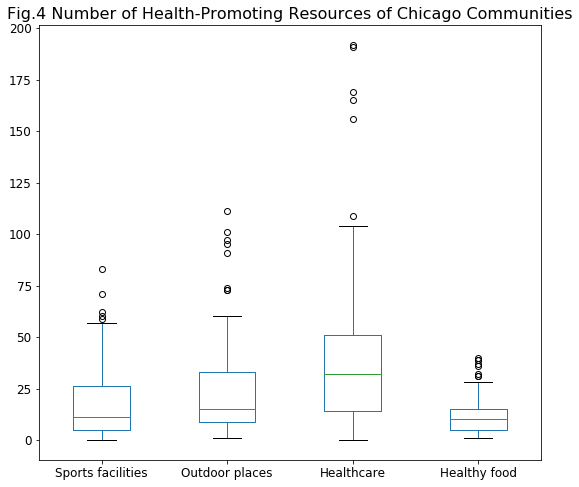

In [30]:
# Box plot of life expectancy of communitities
chicago_venue_grp.drop(['Total'], axis=1).plot(kind='box', figsize=(9, 8), fontsize=12)

# Set title and y limit
plt.title("Fig.4 Number of Health-Promoting Resources of Chicago Communities", fontsize=16)

plt.show()

In [31]:
# Top 10 and bottom 10 communities in terms of total number of resources
chicago_venue_top = chicago_venue_grp.head(10)
chicago_venue_bottom = chicago_venue_grp.tail(10)

pd.concat([chicago_venue_top, chicago_venue_bottom])

,Community,Sports facilities,Outdoor places,Healthcare,Healthy food,Total
0,Loop,60,101,192,37,390
1,Lakeview,71,111,169,36,387
2,Near North Side,62,91,191,40,384
3,Lincoln Park,55,97,165,28,345
4,Uptown,83,95,76,39,293
5,Edgewater,57,74,101,39,271
6,Near West Side,53,37,156,9,255
7,West Town,51,60,104,32,247
8,North Center,59,54,86,13,212
9,Near South Side,43,73,70,26,212


In [32]:
print("Average number of health-promoting resources for the top 10 communities: ", chicago_venue_top.Total.mean(),
      "\nAverage number of health-promoting resources for the bottom 10 communities: ", chicago_venue_bottom.Total.mean())
chicago_venue_grp.describe()

Average number of health-promoting resources for the top 10 communities:  299.6 
Average number of health-promoting resources for the bottom 10 communities:  16.0


,Sports facilities,Outdoor places,Healthcare,Healthy food,Total
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,18.922078,26.038961,43.038961,12.415584,100.415584
std,19.369514,26.267571,43.122665,10.136374,92.018927
min,0.000000,1.000000,0.000000,1.000000,3.000000
25%,5.000000,9.000000,14.000000,5.000000,42.000000
50%,11.000000,15.000000,32.000000,10.000000,65.000000
75%,26.000000,33.000000,51.000000,15.000000,121.000000
max,83.000000,111.000000,192.000000,40.000000,390.000000


In [33]:
# Top 25 communities and number of total resources
top25 = 77 * 0.25
print(chicago_venue_grp.head(int(top25)).sum().Total)

# Top 25 communities and number of healthcare facilities
print(chicago_venue_grp.head(int(top25)).sum().Healthcare)
print(chicago_venue_grp.sum().Healthcare)
print(chicago_venue_grp.head(int(top25)).sum().Healthcare / chicago_venue_grp.sum().Healthcare * 100)

4452
1872
3314
56.48762824381413


In [34]:
# Top 10 communities and number of healthcare facilities
print(chicago_venue_grp.head(10).sum().Healthcare)
print(chicago_venue_grp.sum().Healthcare)
print(chicago_venue_grp.head(10).sum().Healthcare / chicago_venue_grp.sum().Healthcare * 100)

1310
3314
39.52926976463488


#### 4.3 Health-promoting resources and life expectancy

I looked at the disparity of health-promoting resources across communities. Then, how does it relate to life expectancy? To compare health-promoting resources and life expectancy across communities life expectancy was added to the venue list. The table below shows a complete table of number of resources and life expectancy. At a glance, it is clear that the communities with the most number of health-promoting resources have life expectancies that are in the high 70s and in the 80s. However, the communities with the fewest number of resources have life expectancies that are in the 60s or in the low 70s with a few exceptions.

In [76]:
# Sort by total number of health-promoting resources and merge wiht the life expectancy dataframe
chicago_complete = chicago_venue_grp.merge(chicago_le_comm.reset_index(), on='Community')
chicago_complete.set_index('Geo_ID', inplace=True)
chicago_complete.index.rename('ID', inplace=True)

chicago_complete

,Community,Sports facilities,Outdoor places,Healthcare,Healthy food,Total,Life Expectancy
ID,,,,,,,
32,Loop,60,101,192,37,390,82.0
6,Lakeview,71,111,169,36,387,81.7
8,Near North Side,62,91,191,40,384,83.3
7,Lincoln Park,55,97,165,28,345,81.3
3,Uptown,83,95,76,39,293,76.1
77,Edgewater,57,74,101,39,271,80.3
28,Near West Side,53,37,156,9,255,78.4
24,West Town,51,60,104,32,247,80.6
5,North Center,59,54,86,13,212,82.1


Next, scatter plot of total number of health-promoting resources and life expectancy was displayed. Regression line was plotted on the scatter plot to demonstrate the positive relationship between number of resources and life expectancy. However, it looks as if two lines should be fitted as from 0 to about 120 resources, life expectancy increases drastically, but from 100 to 400 resources, life expectancy slowly increases. The Pearson coefficient was 0.503, which shows a moderate correlation between the two variables, but it is statistically significant at $\alpha$=0.01.

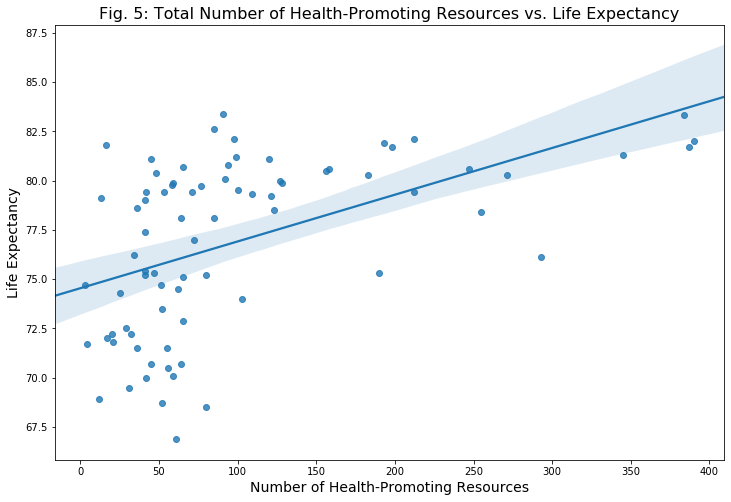

In [152]:
# Scatter plot of number of health-promoting resources vs. life expectancy
fig = plt.figure(figsize=(12, 8))
sns.regplot(x='Total', y='Life Expectancy', data=chicago_complete)

plt.title('Fig. 5: Total Number of Health-Promoting Resources vs. Life Expectancy', fontsize=16)
plt.xlabel('Number of Health-Promoting Resources', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)

plt.show()

In [63]:
# Correlation test using Pearson Coefficient
pearson_coef, p_value = stats.pearsonr(chicago_complete['Total'], chicago_complete['Life Expectancy'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P=", p_value)

The Pearson Correlation Coefficient is 0.5029675906258727  with a P-value of P= 3.13421596734285e-06


Scatter plots of each category versus life expectancy were also used to demonstrate the relationship between health-promoting resources and life expectancy. Correlation test was also performed here to test the statistical significance of the correlation. Each category of resources shows positive correlation with life expectancy, but some seem to be more correlated than others. The Pearson coefficients are 0.489, 0.358, 0.534, 0.434 for the 4 categories. Healthcare facilities shows the highest correlation with life expectancy (r = 0.534) while outdoor places shows the lowest correlation with life expectancy (r = 0.358). They are all statistically significant at $\alpha$=0.01.

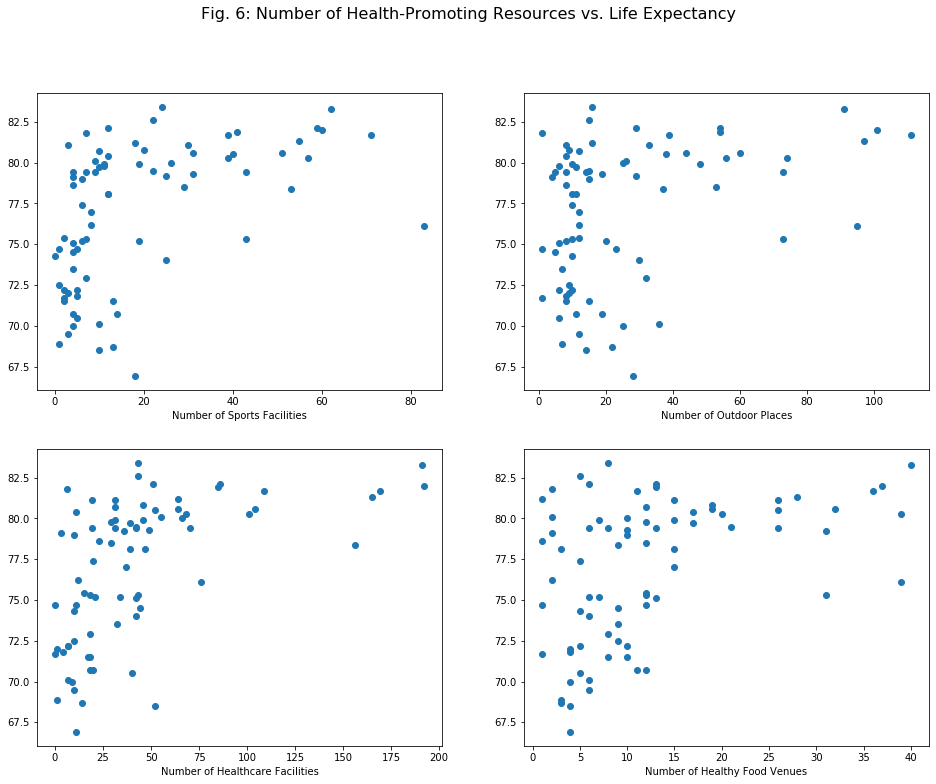

In [64]:
# Create 4 subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Fig. 6: Number of Health-Promoting Resources vs. Life Expectancy', fontsize=16)

# Create a scatter plot of number of sports facilities vs. life expectancy
ax[0, 0].scatter(chicago_complete['Sports facilities'], chicago_complete['Life Expectancy'])
ax[0, 0].set_xlabel('Number of Sports Facilities')

# Create a scatter plot of number of outdoor places vs. life expectancy
ax[0, 1].scatter('Outdoor places', 'Life Expectancy', data=chicago_complete)
ax[0, 1].set_xlabel('Number of Outdoor Places')

# Create a scatter plot of number of healthcare facilities vs. life expectancy
ax[1, 0].scatter('Healthcare', 'Life Expectancy', data=chicago_complete)
ax[1, 0].set_xlabel('Number of Healthcare Facilities')

# Create a scatter plot of number of healthy food venues vs. life expectancy
ax[1, 1].scatter('Healthy food', 'Life Expectancy', data=chicago_complete)
ax[1, 1].set_xlabel('Number of Healthy Food Venues')

plt.show()

In [65]:
# Correlation test using Pearson Coefficient
for col in chicago_complete.columns[1:5]:
    pearson_coef, p_value = stats.pearsonr(chicago_complete[col], chicago_complete['Life Expectancy'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P=", p_value)

The Pearson Correlation Coefficient is 0.48881431586861407  with a P-value of P= 6.465453675664565e-06
The Pearson Correlation Coefficient is 0.35835745521375706  with a P-value of P= 0.0013736271300807054
The Pearson Correlation Coefficient is 0.5335061377527421  with a P-value of P= 5.855394655821701e-07
The Pearson Correlation Coefficient is 0.43359252664773695  with a P-value of P= 8.175033332600771e-05


#### 4.4 Clustering of communities based on health-promoting resources

To group communities based on health-promoting resources, *k*-means clustering was used as explained in the methodology section. Using the elbow method, optimal number of clusters was determined to be 4.

In [153]:
# Normalization of data using StandardScaler
X = chicago_complete.values[:, 1:5]
clus_dataset = StandardScaler().fit_transform(X)

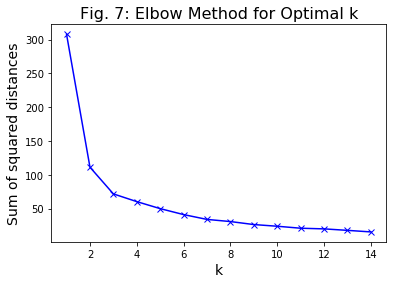

In [67]:
# Elbow method to find the optimal number of clusters
sum_of_sqrd_dist = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(clus_dataset)
    sum_of_sqrd_dist.append(km.inertia_)
    
# Plot of sum of squared distances
plt.plot(K, sum_of_sqrd_dist, 'bx-')
plt.xlabel('k', fontsize=14)
plt.ylabel('Sum of squared distances', fontsize=14)
plt.title('Fig. 7: Elbow Method for Optimal k', fontsize=16)

plt.show()

The communities were clustered into 5 different groups. The clusters were straightforward. Cluster 1 had communities with the most number of resources. The number of resources in each category are all well above the third quartile and Cluster 2. Cluster 2, with the second highest life expectancy, can also be characterized as having a high number of resources in all the categories. They are all above the third quartile, but much fewer than in cluster 1. With cluster 4, the number of resources in each category are also all a little over the third quartile with the exception of healthcare. The number of resources in communities of cluster 0 are a little over the second quartile for sports facilities and healthcare, but a little below for the other two. Cluster 3, with the lowest life expectancy, can be characterized as having the lowest number of resources across categories. When ANOVA was performed, the result was significant at $\alpha$=0.01, indicating that life expectancy is indeed different across the clusters.

In [143]:
# Cluster into 5 groups
kclusters = 5
k_means = KMeans(init="k-means++", n_clusters=kclusters, random_state=0, n_init=12)
k_means.fit(X)
labels = k_means.labels_

In [144]:
# Add cluster labels to the table and view top 10 
chicago_complete['Cluster'] = labels
chicago_complete.head(10)

,Community,Sports facilities,Outdoor places,Healthcare,Healthy food,Total,Life Expectancy,Cluster
ID,,,,,,,,
32,Loop,60,101,192,37,390,82.0,1
6,Lakeview,71,111,169,36,387,81.7,1
8,Near North Side,62,91,191,40,384,83.3,1
7,Lincoln Park,55,97,165,28,345,81.3,1
3,Uptown,83,95,76,39,293,76.1,2
77,Edgewater,57,74,101,39,271,80.3,2
28,Near West Side,53,37,156,9,255,78.4,1
24,West Town,51,60,104,32,247,80.6,2
5,North Center,59,54,86,13,212,82.1,2


In [145]:
# Look at each custer
chicago_complete.groupby('Cluster').mean().sort_values('Life Expectancy', ascending=False)

,Sports facilities,Outdoor places,Healthcare,Healthy food,Total,Life Expectancy
Cluster,,,,,,
1,60.200000,87.400000,174.600000,30.000000,352.200000,81.340000
2,53.285714,64.142857,90.142857,24.714286,232.285714,80.300000
4,30.700000,42.900000,47.700000,19.600000,140.900000,78.940000
0,12.652174,12.782609,41.869565,9.521739,76.826087,78.191304
3,5.781250,12.375000,11.562500,6.812500,36.531250,73.950000


In [132]:
# Perform ANOVA to see if Life Expectancy is indeed different across the clusters
grouped_test = chicago_complete[['Cluster', 'Life Expectancy']].groupby('Cluster')

f_val, p_val = stats.f_oneway(grouped_test.get_group(0)['Life Expectancy'],
                              grouped_test.get_group(1)['Life Expectancy'],
                              grouped_test.get_group(2)['Life Expectancy'],
                              grouped_test.get_group(3)['Life Expectancy'],
                              grouped_test.get_group(4)['Life Expectancy'])

print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 11.113666320045157 , P = 4.476002426748586e-07


Finally, a choropleth map with the cluster markers visualize the community clusters with life expectancies. Communities to the west and south have the lowest life expectancies, and most of them belong to cluster 3.

In [154]:
# Merge chicago_complete and comm_coord to add the coordinates for each community
chicago_merged = chicago_complete.merge(comm_coord.reset_index(), on='Community')

# Fix community names to fit the geojson file
for i in chicago_merged['Community'].index:
    chicago_merged['Community'][i] = chicago_merged['Community'][i].upper() # uppercase community names
    
chicago_merged['Community'][chicago_merged['Community']=="O'HARE"] = 'OHARE'
chicago_merged['Community'][chicago_merged['Community']=="LAKEVIEW"] = 'LAKE VIEW'

In [155]:
# Choropleth map of life expectancy of Chicago communities
map_choro = folium.Map(location=[lat_ch, lng_ch], zoom_start=11) # create a map centering on Chciago

folium.Choropleth(geo_data=ch_geo,
                  name='Choropleth',
                  data=chicago_merged,
                  columns=['Community', 'Life Expectancy'],
                  key_on='feature.properties.community',
                  fill_color='YlOrRd',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='Life Expectancy at Birth (2016)'
                 ).add_to(map_choro)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
incidents = folium.map.FeatureGroup(name='Clusters') 

for lat, lon, comm, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Community'], chicago_merged['Cluster']):
    label = str(comm) + ' Cluster ' + str(cluster)
    incidents.add_child(
        folium.CircleMarker([lat, lon],
                            radius=5,
                            tooltip=label,
                            color=rainbow[cluster-1],
                            fill=True,
                            fill_color=rainbow[cluster-1],
                            fill_opacity=0.7))

# Add incidents to map
map_choro.add_child(incidents)

# Add layer control
folium.LayerControl().add_to(map_choro)

map_choro.save('chicago_choro.html')

In [156]:
# View the html map
IFrame(src='./chicago_choro.html', width=800, height=800)

## 5. Discussions <a name="discussion"></a>

The communities in Chicago were found to have a 16.5 gap in life expectancy at birth in 2016. It is not as high as the 30-year gap reported in the NYU study, but it is still over one and a half decade. Residents in Fuller Park are expected to live less than 70 years while residents in Edison Park are expected to live well over 80 years. Such a wide gap became even more apparent when compared with life expectancies of other nations as the life expectancy of Fuller Park is closer to the bottom quarter of the life expectancies of all the countries in the WHO dataset while life expectancies for Chicago and the US are well above the world mean and only Japan has a higher life expectancy of Edison.

In this study, that alarming gap in life expectancy was shown to be significantly associated with access to health-promoting resources of each community. In accordance with previous research, the communities with higher number of health-promoting resources tend to have higher life expectancy at birth. Among the four categories used in the study, access to sports facilities, access to outdoor places, access to healthcare, and access to healthy food, access to healthcare showed the highest disparity, ranging from 0 to 192, which should be a concern for the stakeholders. When the communities were grouped into clusters based on number of health-promoting resources, the clusters also showed a straight-forward trend with the clusters having more resources in each category having higher life expectancies. However, except for Cluster 3 with the lowest number of resources, all the other clusters have average life expectancies of over that of Chicago. The map shows many communities belong to Cluster 3 and are mostly in the south with some in the west. This shows a serious segregation based on the location of communities. Efforts should be concentrated on bringing more health-promoting resources to the communities in Cluster 3 that have the lowest life expectancies. In addition, additional studies should be carried out to figure out how a few communities in Cluster 3 have high life expectancies although they have low number of resources as the other communities in the cluster.

There are some shortcomings of this study that need to be addressed in a future study. I chose communities officially recognized by the city of Chicago. Neighborhoods might be better at representing an actual community that affects a person, but their boundaries often overlap, and there can be different neighborhoods depending on who you ask. However, the boundaries of community areas themselves also present a challenge. Except for a few communities that were annexed afterwards, they were drawn in 1930s by researchers using available data back then. Using the same community areas as a unit of analysis is outdated, but the data was readily available, and it served as a good starting point.

Since I chose to explore venues certain distance away from a single GPS coordinate representing a community, the venues might be underrepresented or overrepresented, and the area surrounding the GPS coordinate may not representative of the community area. In addition, the arbitrary 1250-meter radius should be revised to use an appropriate unit of analysis, which reflects the current situations and how people use the resources around them. Composition of communities should also be taken into consideration. Some extreme cases include South Deering and Riverdale, with Foursquare venue search returning very few health-promoting resources, which have large percentage of community areas that are parts of marshes, lakes, landfills, and a plant. Another community affected by its lands being occupied by a special facility includes O’Hare as most of its area is occupied by the airport.

In a future study, categories should be further tested and refined. They were constructed based on previously published literature. However, a preliminary analysis should have been performed to choose the categories that can be determinants of life expectancy. In addition to the categories used here, there can be categories of venues a positive effect on mental health, thus prolonging life, such as arts & entertainment places and spiritual center. Types of restaurants can also be considered. There can also be categories of venues that could adversely affect life expectancy that would need to be taken into account such as cigarette shops and liquor stores. The categories included in this study are still quite comprehensive as I used as many as possible from all the Foursquare categories.

Using Foursquare also presented a few challenges. There can also be redundancy in counting the venues of each category in this study. Although users do report duplicate listings, some can still exist, especially since different branches, departments, and sometimes even each hole of a golf course can have their own listings on Foursquare and counted as separate venues. Along with the fact that there are many more venues in areas with denser population, it is possible that the number of resources in the communities with many resources were over-represented. Some venues may not appear on Foursquare because of a number of reasons such as being newly opened or having some changes. There can also be a few that were missed especially in sports facilities category because there can be facilities that can only be categorized as ‘athletics & sports’ and not as any specific sports venue. However, I felt that these discrepancies are not enough to throw the whole picture.


## 6. Conclusion <a name="conclusion"></a>

There was such a wide disparity in the life expectancies of communities that residents in Edison Park are expected to live more than one and a half decade more than the residents in Fuller Park. Disparity in health-promoting resources seem to have an effect on the gap in the life expectancy. Based on the number of health-promoting resources, including sports facilities, outdoor places, healthcare facilities, and healthy food venues, the communities were clustered into 5 groups. Only one cluster had lower mean life expectancy than life the expectancy of Chicago. That cluster had a substantially low number of health-promoting resources, so stakeholders should improve the infrastructure of those communities to bring in those resources. In addition, communities with low number of resources but high life expectancy should be studied to see what sets them apart.

## 7. References <a name="references"></a>

Billaudeau, N., Oppert, J.-M., Simon, C., Charreire, H., Casey, R., Salze, P., … Chaix, B. (2011). Investigating disparities in spatial accessibility to and characteristics of sport facilities: Direction, strength, and spatial scale of associations with area income. Health & Place, 17(1), 114–121. https://doi.org/https://doi.org/10.1016/j.healthplace.2010.09.004

City of Chicago. (2018). Boundaries - Community Areas (current). Retrieved August 9, 2019, from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6

City Tech Collaborative & Chicago Department of Public Health. (n.d.). Life expectancy. Retrieved August 9, 2019, from Chicago Health Atlas website: https://www.chicagohealthatlas.org/indicators/life-expectancy

Coen, S. E., & Ross, N. A. (2006). Exploring the material basis for health: Characteristics of parks in Montreal neighborhoods with contrasting health outcomes. Health & Place, 12(4), 361–371. https://doi.org/https://doi.org/10.1016/j.healthplace.2005.02.001

Hunt, B. R., Tran, G., & Whitman, S. (2015). Life Expectancy Varies in Local Communities in Chicago: Racial and Spatial Disparities and Correlates. Journal of Racial and Ethnic Health Disparities, 2(4), 425–433. https://doi.org/10.1007/s40615-015-0089-8

Inagami, S., Cohen, D. A., Finch, B. K., & Asch, S. M. (2006). You Are Where You Shop: Grocery Store Locations, Weight, and Neighborhoods. American Journal of Preventive Medicine, 31(1), 10–17. https://doi.org/https://doi.org/10.1016/j.amepre.2006.03.019

Kawakami, N., Winkleby, M., Skog, L., Szulkin, R., & Sundquist, K. (2011). Differences in neighborhood accessibility to health-related resources: A nationwide comparison between deprived and affluent neighborhoods in Sweden. Health & Place, 17(1), 132–139. https://doi.org/https://doi.org/10.1016/j.healthplace.2010.09.005

Marmot, M., Allen, J., Bell, R., Bloomer, E., Goldblatt, P., & Consortium for the European Review of Social Determinants of Health and the Health Divide. (2012). WHO European review of social determinants of health and the health divide. Lancet, 380(9846), 1011–1029. https://doi.org/10.1016/S0140-6736(12)61228-8

NYU Langone News. (2019, June 5). Large Life Expectancy Gaps in U.S. Cities Linked to Racial & Ethnic Segregation by Neighborhood. NYU Langone News. Retrieved from https://nyulangone.org/news/large-life-expectancy-gaps-us-cities-linked-racial-ethnic-segregation-neighborhood

Schencker, L. (2019, June 6). Chicago’s lifespan gap: Streeterville residents live to 90. Englewood residents die at 60. Study finds it’s the largest divide in the U.S. Chicago Tribune. Retrieved from https://www.chicagotribune.com/business/ct-biz-chicago-has-largest-life-expectancy-gap-between-neighborhoods-20190605-story.html

Singh, G., Daus, G., Allender, M., Ramey, C., Martin, E., Perry, C., … Vedamuthu, I. (2017). Social Determinants of Health in the United States: Addressing Major Health Inequality Trends for the Nation, 1935-2016. International Journal of MCH and AIDS (IJMA), 6(2). https://doi.org/10.21106/ijma.236

White, K., & Borrell, L. N. (2011). Racial/ethnic residential segregation: Framing the context of health risk and health disparities. Health & Place, 17(2), 438–448. https://doi.org/https://doi.org/10.1016/j.healthplace.2010.12.002

WHO. (2018). Life expectancy and Healthy life expectancy - Data by country. Retrieved August 8, 2019, from WHO website: http://apps.who.int/gho/data/view.main.SDG2016LEXv?lang=en

Williams, D. R., & Jackson, P. B. (2005). Social Sources Of Racial Disparities In Health. Health Affairs, 24(2), 325–334. https://doi.org/10.1377/hlthaff.24.2.325